# Problem Set 7B
# 2. Portfolio Management with Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
from IPython.display import Markdown

> Here we use yfinance package to download stock data from Yahoo!Finance

### (1)  Download  from  Yahoo!Finance  the  daily  closing  price  of  the  
following  constituents  of  S&P 
500:MSFT, AAPL, AMZN, GOOGL, TSLA, GOOG, FB, NVDA, BRK-B, JPM
Also download the daily closing price of S&P 500 (^GSPC).
The period is from 28 November 2021 to 27 November 2022. (In Yahoo!Finance you need to type 
the end date as 11/28/2022.) Calculate the return 𝑅𝑖(𝑡) of the stock 𝑖 on day 𝑡 from 28 November 
2021 to 27 November 2022 using the formula
𝑅𝑖(𝑡) = ln 𝑥𝑖(𝑡 + 1) ― ln 𝑥𝑖(𝑡),
where 𝑥𝑖(𝑡) is the stock price on day 𝑡.

In [2]:
data = yf.download("^GSPC", start="2021-11-28",
                   end="2022-11-28", threads=False)
price_df = pd.DataFrame(index=data.index)
price_df["^GSPC"] = data["Adj Close"]
stock_names = "MSFT, AAPL, AMZN, GOOGL, TSLA, GOOG, META, NVDA, BRK-B, JPM".split(
    ", ")
for stock_name in stock_names:
    data = yf.download(stock_name, start="2021-11-28",
                       end="2022-11-28", threads=False)
    price_df[stock_name] = data["Adj Close"]
price_df.to_csv("data/S&P500.csv")
price_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,^GSPC,MSFT,AAPL,AMZN,GOOGL,TSLA,GOOG,META,NVDA,BRK-B,JPM
Date,,,,,,,,,,,
2021-11-29,4655.270020,333.505005,159.315369,178.078506,145.530502,378.996674,146.113998,338.029999,333.492676,282.119995,156.296783
2021-11-30,4567.000000,327.521088,164.346176,175.353500,141.897507,381.586670,142.451996,324.459991,326.498291,276.690002,153.970215
2021-12-01,4513.040039,327.015808,163.819229,172.186005,141.051498,365.000000,141.617996,310.600006,314.136688,275.000000,153.058975
2021-12-02,4577.100098,326.431305,162.815063,171.867996,142.966003,361.533325,143.776505,310.390015,321.041992,279.089996,156.277405
2021-12-03,4538.430176,320.011444,160.906128,169.489502,142.001495,338.323334,142.520493,306.839996,306.721680,277.429993,153.446747
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18,3965.340088,241.220001,151.289993,94.139999,97.430000,180.190002,97.800003,112.050003,154.089996,310.760010,133.839996
2022-11-21,3949.939941,242.050003,148.009995,92.459999,95.599998,167.869995,95.830002,109.860001,153.169998,311.200012,133.050003
2022-11-22,4003.580078,245.029999,150.179993,93.199997,97.050003,169.910004,97.330002,111.440002,160.380005,315.760010,135.039993


In [3]:
return_df = price_df.apply(np.log).diff()
return_df

,^GSPC,MSFT,AAPL,AMZN,GOOGL,TSLA,GOOG,META,NVDA,BRK-B,JPM
Date,,,,,,,,,,,
2021-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30,-0.019143,-0.018105,0.031089,-0.015421,-0.025281,0.006811,-0.025382,-0.040972,-0.021196,-0.019435,-0.014997
2021-12-01,-0.011886,-0.001544,-0.003211,-0.018229,-0.005980,-0.044441,-0.005872,-0.043656,-0.038597,-0.006127,-0.005936
2021-12-02,0.014095,-0.001789,-0.006149,-0.001849,0.013482,-0.009543,0.015127,-0.000676,0.021744,0.014763,0.020809
2021-12-03,-0.008484,-0.019863,-0.011794,-0.013936,-0.006769,-0.066352,-0.008774,-0.011503,-0.045631,-0.005966,-0.018279
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18,0.004747,-0.001905,0.003775,-0.007514,-0.009500,-0.016403,-0.007132,0.005369,-0.017243,0.010741,0.009761
2022-11-21,-0.003891,0.003435,-0.021919,-0.018007,-0.018961,-0.070822,-0.020349,-0.019738,-0.005988,0.001415,-0.005920
2022-11-22,0.013489,0.012236,0.014555,0.007972,0.015054,0.012079,0.015531,0.014280,0.045998,0.014547,0.014846


### (2) Construct and output the correlation matrix of the 10 stocks.

In [4]:
CMdf = return_df.loc[:,"MSFT":].corr()
CMdf

,MSFT,AAPL,AMZN,GOOGL,TSLA,GOOG,META,NVDA,BRK-B,JPM
MSFT,1.000000,0.810413,0.729018,0.844061,0.576430,0.839346,0.594170,0.771785,0.610832,0.512967
AAPL,0.810413,1.000000,0.683967,0.776904,0.668603,0.769650,0.556775,0.748972,0.641247,0.528112
AMZN,0.729018,0.683967,1.000000,0.717235,0.601187,0.719412,0.589946,0.697680,0.544159,0.496756
GOOGL,0.844061,0.776904,0.717235,1.000000,0.564512,0.997506,0.647684,0.765353,0.609479,0.516643
TSLA,0.576430,0.668603,0.601187,0.564512,1.000000,0.558566,0.392082,0.690754,0.398875,0.382005
GOOG,0.839346,0.769650,0.719412,0.997506,0.558566,1.000000,0.649263,0.761417,0.605628,0.513054
META,0.594170,0.556775,0.589946,0.647684,0.392082,0.649263,1.000000,0.564882,0.411686,0.378476
NVDA,0.771785,0.748972,0.697680,0.765353,0.690754,0.761417,0.564882,1.000000,0.551855,0.521554
BRK-B,0.610832,0.641247,0.544159,0.609479,0.398875,0.605628,0.411686,0.551855,1.000000,0.706998
JPM,0.512967,0.528112,0.496756,0.516643,0.382005,0.513054,0.378476,0.521554,0.706998,1.000000


### (3) Compute and output the eigenvalues and eigenvectors of the correlation matrix, respectively.

In [5]:
CM = CMdf.to_numpy()
eigvals,eigvecs = np.linalg.eigh(CM)
with np.printoptions(precision=3):
    print("eigenvalues:\n",eigvals)
    print("eigenvectors:\n",eigvecs)

eigenvalues:
 [2.375e-03 1.510e-01 2.218e-01 2.406e-01 3.047e-01 3.295e-01 4.698e-01
 6.763e-01 8.778e-01 6.726e+00]
eigenvectors:
 [[ 8.328e-03  7.487e-01 -2.411e-01 -3.955e-01 -7.809e-02  7.331e-02
   2.820e-01 -6.521e-02  9.336e-02  3.477e-01]
 [ 9.396e-03 -5.248e-01 -5.102e-01 -2.470e-01 -4.274e-01 -2.280e-01
   1.566e-01  1.626e-01  3.444e-02  3.411e-01]
 [-9.917e-03 -1.489e-01 -6.892e-03  2.850e-02 -1.123e-01  8.850e-01
  -2.548e-01  3.653e-02  1.086e-01  3.209e-01]
 [-7.122e-01 -1.009e-01  2.378e-02  3.438e-01  2.371e-01 -4.440e-02
   3.362e-01 -2.232e-01  1.284e-01  3.554e-01]
 [ 3.828e-03  2.485e-01 -8.499e-03  4.249e-01 -1.973e-02 -2.114e-01
  -2.742e-01  7.108e-01  2.386e-01  2.741e-01]
 [ 7.018e-01 -1.072e-01  3.307e-02  3.560e-01  2.440e-01 -2.966e-02
   3.325e-01 -2.333e-01  1.315e-01  3.542e-01]
 [-1.872e-03  6.535e-02  1.036e-02  1.819e-03 -1.518e-01 -3.037e-01
  -6.654e-01 -5.572e-01  2.304e-01  2.719e-01]
 [ 1.380e-03 -2.145e-01  5.756e-01 -5.718e-01  3.235e-01 -1.259

### (4) Sort the eigenvalues and eigenvectors in descending magnitude of the eigenvalues. 
Output 
the sorted eigenvalues and eigenvectors.

In [6]:
# since we use np.linalg.eigh here, so the eigenvalues is given in ascending order
# we just need to reverse it to get in descending of eigenvalues.
eigvals,eigvecs = eigvals[::-1], eigvecs[:,::-1]
with np.printoptions(precision=3):
    print("eigenvalues:\n",eigvals)
    print("eigenvectors:\n",eigvecs)

eigenvalues:
 [6.726e+00 8.778e-01 6.763e-01 4.698e-01 3.295e-01 3.047e-01 2.406e-01
 2.218e-01 1.510e-01 2.375e-03]
eigenvectors:
 [[ 3.477e-01  9.336e-02 -6.521e-02  2.820e-01  7.331e-02 -7.809e-02
  -3.955e-01 -2.411e-01  7.487e-01  8.328e-03]
 [ 3.411e-01  3.444e-02  1.626e-01  1.566e-01 -2.280e-01 -4.274e-01
  -2.470e-01 -5.102e-01 -5.248e-01  9.396e-03]
 [ 3.209e-01  1.086e-01  3.653e-02 -2.548e-01  8.850e-01 -1.123e-01
   2.850e-02 -6.892e-03 -1.489e-01 -9.917e-03]
 [ 3.554e-01  1.284e-01 -2.232e-01  3.362e-01 -4.440e-02  2.371e-01
   3.438e-01  2.378e-02 -1.009e-01 -7.122e-01]
 [ 2.741e-01  2.386e-01  7.108e-01 -2.742e-01 -2.114e-01 -1.973e-02
   4.249e-01 -8.499e-03  2.485e-01  3.828e-03]
 [ 3.542e-01  1.315e-01 -2.333e-01  3.325e-01 -2.966e-02  2.440e-01
   3.560e-01  3.307e-02 -1.072e-01  7.018e-01]
 [ 2.719e-01  2.304e-01 -5.572e-01 -6.654e-01 -3.037e-01 -1.518e-01
   1.819e-03  1.036e-02  6.535e-02 -1.872e-03]
 [ 3.358e-01  1.294e-01  2.123e-01 -2.576e-02 -1.259e-01  3.235

### (5) Plot the eigenvalues of the eigenmodes versus the eigenmode numbers.

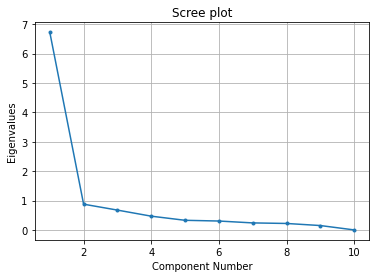

In [7]:
p = len(eigvals)
plt.plot(np.arange(p)+1,eigvals,marker='.')
plt.grid(True)
plt.xlabel("Component Number")
plt.ylabel("Eigenvalues")
plt.title("Scree plot")
plt.show()

### (7)Compute the cumulative variance. 
Let 𝑁 be the number of first few principal portfolios whose 
cumulative variance corresponds to the 80% cutoff. Determine 𝑁.

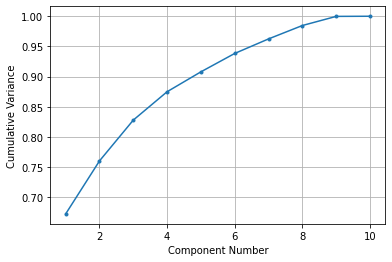

In [8]:
CumVar = eigvals.cumsum()/p

plt.plot(np.arange(p)+1,CumVar,marker='.')
plt.xlabel("Component Number")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()

In [9]:
N = np.argwhere(CumVar >= .8).T.flatten()[0] + 1
Markdown(f"$N={N}$")

$N=3$

### (8)  Plot  the  10  stocks  in  the  space  of  the  2nd  and  3rd  principal  components.  
Comment  on  any 
clusters that you observe, and comment on the nature of the clusters.

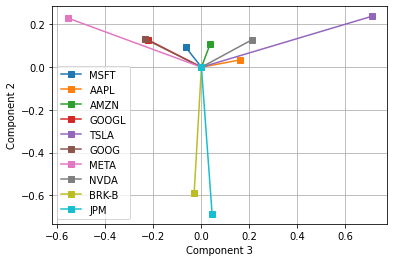

In [10]:
u2 = eigvecs[:,1]
u3 = eigvecs[:,2]

for name,x,y in zip(stock_names,u2,u3):
    plt.plot((0,y),(0,x),marker='s',label=name)
plt.xlabel("Component 3")
plt.ylabel("Component 2")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
volumn_df = pd.DataFrame(columns=stock_names)

Assume total capital is 1000.

In [76]:
total_capital = 1

### (A) Stock investment with equal weight
(9)  In  this  strategy,  the  capital  allocated  to  each  of  the  10  stocks  is  the  same.  
Considering  the 
stock  price,  compute  the  volume  of  stocks  to  be  invested.  Then  compute  the  value  of  the 
portfolio during the period.

In [77]:
def portfolio(weight,name):
    each_capital = total_capital*weight
    volumn_df.loc[name] = each_capital/price_df.iloc[0]["MSFT":"JPM"]
    price_df[name] = (volumn_df.loc[name].to_numpy()*price_df.loc[:,"MSFT":"JPM"]).sum(axis=1)
    print("Volumn:\n",volumn_df.loc[name])
    print("Value of portfolio:\n", price_df[name])

In [78]:
portfolio(1/p,'A')

Volumn:
 MSFT     0.000300
AAPL     0.000628
AMZN     0.000562
GOOGL    0.000687
TSLA     0.000264
GOOG     0.000684
META     0.000296
NVDA     0.000300
BRK-B    0.000354
JPM      0.000640
Name: A, dtype: float64
Value of portfolio:
 Date
2021-11-29    1.000000
2021-11-30    0.985989
2021-12-01    0.969210
2021-12-02    0.975622
2021-12-03    0.955773
                ...   
2022-11-18    0.676718
2022-11-21    0.666835
2022-11-22    0.677587
2022-11-23    0.687677
2022-11-25    0.683393
Name: A, Length: 251, dtype: float64


### (B) Risk Parity (or Equal Risk Contribution)
(10) In this strategy, the risk of stock 𝑖 per unit of capital is estimated by its standard deviation 𝜎𝑖 
(note that the risk correlations of the stocks are neglected). The capital allocated to each of the 
10 stocks is such that the risk of each stock is the same. Hence the capital allocated to each stock 
is proportional to 1/𝜎𝑖. Compute the weight of the stocks to be invested. Then compute the value 
of the portfolio during the period.

In [79]:
weightB = 1/price_df.loc[:,"MSFT":"JPM"].std()
weightB /= weightB.sum()
print('Weight:\n',weightB)
portfolio(weightB,'B')

Weight:
 MSFT     0.077503
AAPL     0.182933
AMZN     0.096604
GOOGL    0.139031
TSLA     0.045798
GOOG     0.139723
META     0.034018
NVDA     0.040658
BRK-B    0.098424
JPM      0.145308
dtype: float64
Volumn:
 MSFT     0.000232
AAPL     0.001148
AMZN     0.000542
GOOGL    0.000955
TSLA     0.000121
GOOG     0.000956
META     0.000101
NVDA     0.000122
BRK-B    0.000349
JPM      0.000930
Name: B, dtype: float64
Value of portfolio:
 Date
2021-11-29    1.000000
2021-11-30    0.989972
2021-12-01    0.979583
2021-12-02    0.986835
2021-12-03    0.971620
                ...   
2022-11-18    0.752127
2022-11-21    0.741608
2022-11-22    0.752739
2022-11-23    0.761388
2022-11-25    0.755705
Name: B, Length: 251, dtype: float64


### (C) Equal Weight Portfolio (or 1/N Strategy)
(11) In this strategy, the first 𝑁 principal portfolios are selected, 
and equal weight is allocated to 
each of them. The first step is to determine the signs of the eigenvectors  $\pm u_a$ to be adopted. 
We  will  consider  a  portfolio  with  equal  capital  allocated  to  the  10  stocks,  and  require  the 
projection of this portfolio to the principal eigenvectors to be positive. Compute the projections.

In [80]:
projs = (np.ones(p)/p)@eigvecs
projs

array([ 3.14108356e-01, -1.80257563e-02,  5.76833312e-03, -2.88942496e-02,
       -6.72502327e-03, -1.85260979e-03,  7.63043648e-03,  5.08306692e-04,
        5.96903118e-03,  3.03710554e-04])

(12) Compute the sign-corrected principal eigenvectors. Then compute the total weight of each 
stock contributed from the 𝑁 principal portfolios.

In [81]:
signed_eigenvecs = eigvecs*np.sign(projs)
signed_eigenvecs

array([[ 3.47731636e-01, -9.33570773e-02, -6.52087612e-02,
        -2.82034071e-01, -7.33126494e-02,  7.80880181e-02,
        -3.95469958e-01, -2.41141836e-01,  7.48654830e-01,
         8.32796250e-03],
       [ 3.41142521e-01, -3.44419356e-02,  1.62578496e-01,
        -1.56578350e-01,  2.27998869e-01,  4.27428512e-01,
        -2.47013184e-01, -5.10227264e-01, -5.24759667e-01,
         9.39607370e-03],
       [ 3.20929645e-01, -1.08646438e-01,  3.65280206e-02,
         2.54799621e-01, -8.84990726e-01,  1.12306561e-01,
         2.85007843e-02, -6.89244707e-03, -1.48874028e-01,
        -9.91691758e-03],
       [ 3.55417230e-01, -1.28384326e-01, -2.23216537e-01,
        -3.36178158e-01,  4.43975650e-02, -2.37119247e-01,
         3.43782030e-01,  2.37840749e-02, -1.00916677e-01,
        -7.12195238e-01],
       [ 2.74101107e-01, -2.38613392e-01,  7.10818527e-01,
         2.74199540e-01,  2.11390182e-01,  1.97315850e-02,
         4.24947389e-01, -8.49936605e-03,  2.48478465e-01,
         3.

In [82]:
signed_principal_eigenvecs = signed_eigenvecs[:,:N].copy()
signed_principal_eigenvecs /= signed_principal_eigenvecs.sum(axis=0)
weightC = signed_principal_eigenvecs.mean(axis=1)
weightC

array([-0.51255536,  0.91200058,  0.04423122, -1.48958824,  3.69543307,
       -1.55357116, -3.61723218,  1.02317224,  0.94302598,  1.55508385])

(13)  Which  stocks  in  this  strategy  are  in  short  positions?  Compute  the  value  of  the  portfolio 
during the period. Note that the initial value is no longer equal to 1 due to the short-positioned 
stocks.

In [83]:
short_stock = list(zip(*filter(lambda _: weightC[_[0]] < 0, enumerate(stock_names))))[-1]
print(f"Stocks {', '.join(short_stock)} are in short positions.")

Stocks MSFT, GOOGL, GOOG, META are in short positions.


In [84]:
portfolio(weightC,'C')

Volumn:
 MSFT    -0.001537
AAPL     0.005724
AMZN     0.000248
GOOGL   -0.010236
TSLA     0.009751
GOOG    -0.010633
META    -0.010701
NVDA     0.003068
BRK-B    0.003343
JPM      0.009950
Name: C, dtype: float64
Value of portfolio:
 Date
2021-11-29    1.000000
2021-11-30    1.221148
2021-12-01    1.169592
2021-12-02    1.157441
2021-12-03    0.913046
                ...   
2022-11-18    1.882678
2022-11-21    1.795982
2022-11-22    1.833364
2022-11-23    1.956009
2022-11-25    1.966923
Name: C, Length: 251, dtype: float64


### (D) Diversified Risk Parity
(14) In this strategy, the capital allocated to each of the 𝑁 principal portfolios are such that the 
risk of each portfolio is the same. Since the eigenvalue of each portfolio is the variance $\lambda_a$, the 
capital allocated to each portfolio is proportional to $1/\sqrt{\lambda_a}$. Compute the volume of stocks to be 
acquired.  Which  stocks  in  this  strategy  are  in  short  positions?  Then  compute  the  value  of  the 
strategy during the period.

In [108]:
weight_portfolio = 1/(eigvals[:N]**.5)
weight_portfolio /= weight_portfolio.sum()
weightD = signed_principal_eigenvecs@weight_portfolio
weightD

array([-0.70617458,  1.22338997,  0.06223088, -2.03154362,  5.0975575 ,
       -2.11792234, -4.89986297,  1.40522275,  1.07918489,  1.8879175 ])

In [86]:
short_stock = list(zip(*filter(lambda _: weightD[_[0]] < 0, enumerate(stock_names))))[-1]
print(f"Stocks {', '.join(short_stock)} are in short positions.")

Stocks MSFT, GOOGL, GOOG, META are in short positions.


In [87]:
portfolio(weightD,'D')

Volumn:
 MSFT    -0.002117
AAPL     0.007679
AMZN     0.000349
GOOGL   -0.013960
TSLA     0.013450
GOOG    -0.014495
META    -0.014495
NVDA     0.004214
BRK-B    0.003825
JPM      0.012079
Name: D, dtype: float64
Value of portfolio:
 Date
2021-11-29    1.000000
2021-11-30    1.307338
2021-12-01    1.235406
2021-12-02    1.210843
2021-12-03    0.879015
                ...   
2022-11-18    2.160261
2022-11-21    2.041134
2022-11-22    2.086158
2022-11-23    2.253062
2022-11-25    2.266803
Name: D, Length: 251, dtype: float64


## Comparison of the Strategies

First of all, show the data frame of volumn and price in period of each strategies(A-D).

In [88]:
volumn_df

,MSFT,AAPL,AMZN,GOOGL,TSLA,GOOG,META,NVDA,BRK-B,JPM
A,0.000300,0.000628,0.000562,0.000687,0.000264,0.000684,0.000296,0.000300,0.000354,0.000640
B,0.000232,0.001148,0.000542,0.000955,0.000121,0.000956,0.000101,0.000122,0.000349,0.000930
C,-0.001537,0.005724,0.000248,-0.010236,0.009751,-0.010633,-0.010701,0.003068,0.003343,0.009950
D,-0.002117,0.007679,0.000349,-0.013960,0.013450,-0.014495,-0.014495,0.004214,0.003825,0.012079


In [89]:
portfolio_price_df = price_df.loc[:,'A':'D']
portfolio_price_df 

,A,B,C,D
Date,,,,
2021-11-29,1.000000,1.000000,1.000000,1.000000
2021-11-30,0.985989,0.989972,1.221148,1.307338
2021-12-01,0.969210,0.979583,1.169592,1.235406
2021-12-02,0.975622,0.986835,1.157441,1.210843
2021-12-03,0.955773,0.971620,0.913046,0.879015
...,...,...,...,...
2022-11-18,0.676718,0.752127,1.882678,2.160261
2022-11-21,0.666835,0.741608,1.795982,2.041134
2022-11-22,0.677587,0.752739,1.833364,2.086158


(15) Plot the value of the 4 strategies. Comment on any observations you make.

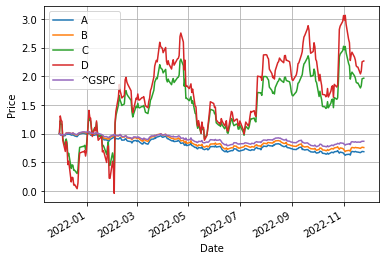

In [90]:
price_df.loc[:,'A':'D'].plot()
(price_df['^GSPC']/price_df.iloc[0]['^GSPC']*total_capital).plot(label="^GSPC")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

(16)  The  ability  of  the  4  strategies  to  reduce  risks  is  compared  by  calculating  the  following 
parameters:

* Gain (the final value divided by the initial value)

* Standard deviation

* Minimum value (divided by the initial value)

In [92]:
perf_df = pd.DataFrame(columns=volumn_df.index)
perf_df.loc['Gain',:] = portfolio_price_df.iloc[-1]/portfolio_price_df.iloc[0]
perf_df.loc['Std',:] = (portfolio_price_df).std()
perf_df.loc['Min',:] = portfolio_price_df.min(axis=0)/portfolio_price_df.iloc[0]
perf_df

,A,B,C,D
Gain,0.683393,0.755705,1.966923,2.266803
Std,0.109564,0.097459,0.496852,0.679264
Min,0.621058,0.685451,0.256291,-0.044144


(17)  The  standard  deviation  is  not  informative  of  the  risk  when  the  price  has  a  trend.  Another 
common risk measure is the beta coefficient, or systematic risk, defined as
$$
\beta=\frac{\text{covariance}(\text{portfolio return},\text{market return})}{\text{variance}(\text{market return})}
$$
Compute 𝛽 of the 4 strategies from: the covariance of the daily returns of the strategies and the 
daily returns of the market (S&P 500) averaged over the one-year period, and the variance of the 
daily returns of the market, also averaged over the one-year period.

In [94]:
ret_df = price_df.apply(np.log).diff()
var_marker_ret = ret_df["^GSPC"].var()

0.00022942960711266368

In [109]:
beta = ret_df[["^GSPC","A","B","C","D"]].cov().loc["^GSPC","A":"D"]/var_marker_ret
beta

A    1.348934
B    1.246468
C    1.109251
D    3.137552
Name: ^GSPC, dtype: float64